# Determine Top Indictators of Heart Disease Using Multiple Linear Regressors
Author: Tommy Phung
Soruce: Kaggle*

Overview

# Data Exploration
The data was provided by Bhavesh Misra on Kaggle with multiple different columns. The idea of this dataset was to see if we can correlate the different features and attempt to connect them having a heart disease or heart attack. Its important to note that some of the columns are a little ambigious and that it will not be used for the purpose not misintretaing the data or author intentions. 

| **Column Name** | **Description** | **Markers** |
|:---:|:---:|:---:|
| HeartDiseaseorAttack: | Indicates whether the individual has had a heart disease or heart attack | (binary: 0 = No, 1 = Yes) |
| HighBP | High blood pressure status | (binary: 0 = No, 1 = Yes) |
| HighChol | High cholesterol status | (binary: 0 = No, 1 = Yes) |
| CholCheck | Frequency of cholesterol check | categorical |
| BMI | Body Mass Index | continuous |
| Smoker | Smoking status | (binary: 0 = No, 1 = Yes) |
| Stroke | History of stroke | (binary: 0 = No, 1 = Yes) |
| Diabetes | Diabetes status | (binary: 0 = No, 1 = Yes) |
| PhysActivity | Level of physical activity | categorical |
| Fruits | Frequency of fruit consumption | categorical |
| Veggies | Frequency of vegetable consumption | categorical |
| HvyAlcoholConsump | Heavy alcohol consumption status | (binary: 0 = No, 1 = Yes) |
| AnyHealthcare | Access to any healthcare | (binary: 0 = No, 1 = Yes) |
| NoDocbcCost | No doctor because of cost | (binary: 0 = No, 1 = Yes) |
| GenHlth | General health assessment | categorical |
| MentHlth | Mental health assessment | categorical |
| PhysHlth | Level of physical activity | categorical |
| DiffWalk | Difficulty walking status | binary: 0 = No, 1 = Yes |
| Sex | Gender of the individual | binary: 0 = Female, 1 = Male |
| Age | Age of the individual | continuous |
| Education | Educational level | categorical |
| Income | Income level | categorical |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.metrics import f1_score, accuracy_score

In [2]:
df = pd.read_csv('data/heart_disease_health_indicators.csv')
display(df.head())
display(df.info())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

None

# Data Preperation
The data comprise of continous, catergorial and binary based columns. In order to perform linear regression on this sort of data, the categorical and binary data must be change to one hot encoding before modeling. There wasn't any missing data from any of the columns so there isn't any data that needed to be removed or changed. 

In [3]:
cont_col = ['BMI', 'Age']
cat_col = ['Education', 'Income', 'Diabetes']
bin_col = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HighBP', 'HighChol', 'Smoker', 
           'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
on_hold = ['GenHlth','MentHlth', 'PhysHlth']
target = 'HeartDiseaseorAttack'

# Baseline Model

In [4]:
df.corrwith(df.HeartDiseaseorAttack)

HeartDiseaseorAttack    1.000000
HighBP                  0.209347
HighChol                0.180744
CholCheck               0.044202
BMI                     0.052927
Smoker                  0.114451
Stroke                  0.202978
Diabetes                0.180220
PhysActivity           -0.087284
Fruits                 -0.019822
Veggies                -0.039117
HvyAlcoholConsump      -0.028983
AnyHealthcare           0.018726
NoDocbcCost             0.030994
GenHlth                 0.258380
MentHlth                0.064632
PhysHlth                0.181750
DiffWalk                0.212700
Sex                     0.086082
Age                     0.221588
Education              -0.099556
Income                 -0.140966
dtype: float64

From the corralation with the target variable, I looked at all the columns with over 10% collation and see if this may help the model. It is also good to note that there was one that had a negative correlation, Income. This would hint that the higher that individual income, the lower the chance of heart disease. Income is a mixed bag as this feature have indirect influence to other features like fruits, education and Health Care. 


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scalar = MinMaxScaler()
scaled_df = pd.DataFrame(scalar.fit_transform(df), columns= df.columns)
X = scaled_df[scaled_df.columns[1:]]
y = scaled_df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [6]:
log_reg.score(X_test, y_test)

0.9086350447836508

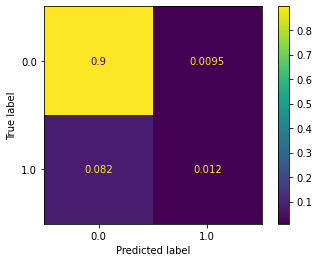

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, normalize= 'all')

## Model 1 Anaysis
With a 90.89% accuracy, at first glance, the model appears to perform really well. However, we had looked at the class distrubtion and it shows that the data had a imbalance. In other words, the model would most likely predict a patient not to have any issues than to have one. 98% of the data were labeled no heart disease and only 2% for haivng a heart disease. In contrast, the actual distribtuion we closer to a 90:10.   

The current solution to improve the model would to under or over sample the data to help balance the data. Both have their own issues. 

In [26]:
result_coef = sorted(list(zip(log_reg.feature_names_in_, log_reg.coef_[0])), key= lambda x: x[1], reverse= True)
result_coef

[('Age', 3.1161919728894545),
 ('GenHlth', 1.9241854726973717),
 ('Stroke', 0.971419650616816),
 ('Sex', 0.7711484274409186),
 ('HighChol', 0.5990986829207463),
 ('HighBP', 0.522324110021835),
 ('CholCheck', 0.4865170142295737),
 ('Smoker', 0.3570597511837154),
 ('DiffWalk', 0.31287917882408567),
 ('Diabetes', 0.2897239711987721),
 ('NoDocbcCost', 0.2588917160199675),
 ('BMI', 0.08562437478990136),
 ('MentHlth', 0.07558802336980108),
 ('Education', 0.05002065906318683),
 ('Veggies', 0.04947204253879112),
 ('PhysActivity', 0.042819692961804406),
 ('PhysHlth', 0.03628745506497476),
 ('AnyHealthcare', 0.024662286911632837),
 ('Fruits', 0.01850972912244357),
 ('Income', -0.29658798518839213),
 ('HvyAlcoholConsump', -0.3276176119861641)]

From the Coefficeint, we can how strong the feature relate to the target columns. For the most part, we can reason the top coeffience and the smallest. For example, Age and genreal health is indicative to heart disease or any disease in general. Then there is the causes of most heart disease with heart related symthos syuch as Strokes, High Colesterold and Higher Blood Pressure. As we go down the list, Education, Veggie, fruits and pychical health and activait have a lower coefficient. Some interesting results regarding the coeffiecnet was that alcohol consump have a negative effect to the patient likelihood of heart disease. Some of the negative make sense when cosider whtat a postive increase means. Higher incomse would expect a lower chance assuming the money is used for their health and life sytle and AnyHealthCare is asking a simple question with 1 being having it. Altough it is couter intitituve to say that acholoh have no eefect in heart relatived disease, I would personally say that drinking alchold would lower heart disease. Interestingly, studies have been done showing some benfiit in acholoh as it reduces streas that can lead to effects on the hearth that could possibly be explored. 

Model 2
I used KNN algortihm to compare with the logistical regression to seee any differnces from the predictions to get a better accuracy. 

In [9]:
log_reg.predict_proba(X_test)

array([[0.98272686, 0.01727314],
       [0.98160845, 0.01839155],
       [0.95989166, 0.04010834],
       ...,
       [0.97910818, 0.02089182],
       [0.98435336, 0.01564664],
       [0.99682702, 0.00317298]])

In [10]:
log_reg.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:

print('F1-Score: {}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy: {}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

F1-Score: 0.2045579352004393
Accuracy: 0.9086350447836508


We can see that the model have a high accuracy but poor F1-Score, indicating that the model have a poor evulation in predicting the correct value. 

In [12]:
scaled_df.HeartDiseaseorAttack.value_counts()

0.0    229773
1.0     23888
Name: HeartDiseaseorAttack, dtype: int64

In [13]:
df_pos = scaled_df.loc[scaled_df.HeartDiseaseorAttack == 1]
df_neg = scaled_df.loc[scaled_df.HeartDiseaseorAttack == 0]

In [14]:
df_bal = pd.concat([df_pos, df_neg.sample(n = len(df_pos), random_state= 11)]).sort_index()
df_bal.HeartDiseaseorAttack.value_counts()
df_bal.reset_index()

,index,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571
1,8,1.0,1.0,1.0,1.0,0.209302,1.0,0.0,1.0,0.0,...,1.0,0.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.8,0.000000
2,20,1.0,1.0,1.0,1.0,0.116279,0.0,1.0,0.0,0.0,...,1.0,0.0,0.50,1.0,0.0,1.0,0.0,0.916667,0.6,0.428571
3,26,1.0,1.0,1.0,1.0,0.290698,1.0,1.0,1.0,0.0,...,1.0,0.0,1.00,0.0,0.0,1.0,1.0,0.750000,1.0,0.571429
4,27,1.0,1.0,1.0,1.0,0.186047,1.0,0.0,1.0,0.0,...,1.0,0.0,0.75,0.0,0.0,0.0,1.0,0.916667,0.2,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47771,253651,0.0,0.0,0.0,1.0,0.139535,0.0,0.0,0.0,1.0,...,1.0,1.0,0.00,0.0,0.0,0.0,1.0,0.083333,1.0,0.285714
47772,253652,0.0,0.0,1.0,1.0,0.174419,0.0,0.0,1.0,1.0,...,1.0,0.0,0.75,0.0,1.0,0.0,1.0,0.833333,0.2,0.285714
47773,253655,0.0,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.083333,1.0,0.428571
47774,253657,0.0,0.0,1.0,1.0,0.139535,0.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.500000,0.8,0.285714


In [15]:
X_2 = df_bal[df_bal.columns[1:]]
y_2 = df_bal[target]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2)
log_reg_2 = LogisticRegression()
log_reg_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [16]:
log_reg_2.score(X_test_2, y_test_2)

0.7718519758874749

In [17]:
result_coef_2 = sorted(list(zip(log_reg_2.feature_names_in_, log_reg_2.coef_[0])), key= lambda x: x[1], reverse= True)
result_coef_2

[('Age', 3.2615857064996145),
 ('GenHlth', 2.0423455160208244),
 ('Stroke', 1.074408541013939),
 ('Sex', 0.844632046451611),
 ('HighChol', 0.6338797011128444),
 ('CholCheck', 0.5630096095594522),
 ('HighBP', 0.5525308814407136),
 ('Smoker', 0.39741871598151424),
 ('DiffWalk', 0.32968688714050376),
 ('Diabetes', 0.3160870316681815),
 ('NoDocbcCost', 0.307829588272258),
 ('MentHlth', 0.12561720623595318),
 ('PhysHlth', 0.06436437472423276),
 ('AnyHealthcare', 0.04167398558409795),
 ('Veggies', 0.0404017075112297),
 ('PhysActivity', 0.03734505508357189),
 ('Fruits', 0.005469912767328492),
 ('BMI', -0.03946348955052893),
 ('Education', -0.06773385647344003),
 ('Income', -0.37279167427425836),
 ('HvyAlcoholConsump', -0.39917350826945897)]

|Top 5| Baseline | Balanced |
|:---:|:---:|:---:|
| **Age** | 3.1162 | 3.2616 |
| **GenHlth** | 1.9242 | 2.0423 |
| **Stroke** | 0.9714 | 1.0744 |
| **Sex** | 0.7711 | 0.8446 |
| **HighChol** | 0.5991 | 0.6339 |

|Difference| Baseline | Balanced |
|:---:|:---:|:---:|
| **BMI** | 0.0856 | **-0.03946** |
| **Education** | 0.0500 | **-0.06773** |

| Last 5 | Baseline | Balanced |
|:---:|:---:|:---:|
| **PhysHlth** | 0.03629 | 0.06436 |
| **AnyHealthcare** | 0.024662 | 0.04167 |
| **Fruits** | 0.01851 | 0.0054670 |
| **Income** | -0.2966 | -0.3728 |
| **HvyAlcoholConsump** | -0.3276 | -0.39917 |
|  |  |  |

# Model Anaysis
Looking at the highest coefficient, we can see that their is some consistency in feature that increases the chances of heaert diseases. Most noteable is the fact that these features were increased compare to the baseline verision. 
Some of these features were ovious is some ways. Stroke and High Cholestorl are heart related issues and have direct effect on the heart. Sex could be contributed to unheatlhy life systle and the longer lifespan compared to the female counterpart.
Interestingly, genreal health is somewhat missleading since the suthor gave no clear indication on whehter a positve value is a good or bad assessment of health. One possibllty is that this is the patiet previeved precepthion on their own health which may pressume that people are mistaking their lify sytle as a healthy one. 
Regardless, it is safeer to avoid using the feature until more information is given.

The largest differences in the list of coefficients were the BMI and Education. At first we can argue that a higher BMI and having more education, would results in higher chance of heart disease. Although BMI would theorthically make logical sense, having education as a factor to heart disesase was a strech. However, with a more balanced dataset, both of the features became negative values meaing that they improve teh chances of not having heart diseases. BMI have had a history of being unreiable due to the metric not taking intoacount multiple factors and could explain the inconsistency of the value. Education was strang to see since this would apply that more education lead to lower risk. This could contribute many things such as being more educated in food choice, higher education usually leading to higher paid carreres which intiurn more access to healthy food option. That however is specualion as education doesnt explins indiviual lifystyle or at least not the maijority of it. Both of these feature plays only a small amount so it is not worth considering in isolation. 

Strangley enoguh, the last 5 resutls are quite misleading. Physical health have teh same issue as genreal health but we could agur that this feature along with fruit would understandingly make sense to have a strong affect one way or another. Even the presents of heatlht care doesn't seem to be a major factor though this could be the fact that people who have access doesn't necessary use or need them expeically if the indiviual is healthy. 

Income was one of hte factors that have a negitive effect on the risk. Although not entirely clear why, this could be in relationship with what money could be used for. Food, exceise and resourse are just some instances that may be effected by income. 

Heave Alcohol Consumption is also another interesting feature to consider. Studies have shown that acholhol in moderation could imporve heart though this is measuring heavy use. This is hard to guage since teh data doesnt state the amount to qulify as heavy use. 